# Exercise 01b - `networkx` tutorial

In this exercise, we will introduce data science and network analysis basics with `networkx`.

## 1. Introduction to `networkx`
    
Now that we know the basics of `python` from Exercise 1a, let us introduce some basics of `networkx`, a network analysis package.

<span style="color:red">**TODO:** Import `networkx` and assign it the local alias `nx`.</span>

In [1]:
import networkx as nx

If the `import` statement completes without error, the installation was successful and we can now use `networkx` to visualise and analyse complex networks. 

<span style="color:red">**TODO:** Create an empty directed network instance using `DiGraph`.</span>

In [2]:
G = nx.DiGraph()

We can add nodes and edges by calling the functions `add_node` and `add_edge`. 

<span style="color:red">**TODO:** Add three nodes 'a', 'b', and 'c' and two edges `(a, b)` and `(b,c)` to the network and print a summary.</span>

In [3]:
# Add nodes explicitly (optional)
G.add_nodes_from(['a', 'b', 'c'])

# Add edges; if a node doesn't exist, it is created automatically.
G.add_edge('a', 'b')
G.add_edge('b', 'c')
print(G)

DiGraph with 3 nodes and 2 edges


We can now plot the network using `nx.draw(G)`.

<span style="color:red">**TODO:** Visualize the network. Try to add a layout, e.g. nx.spring_layout()</span>

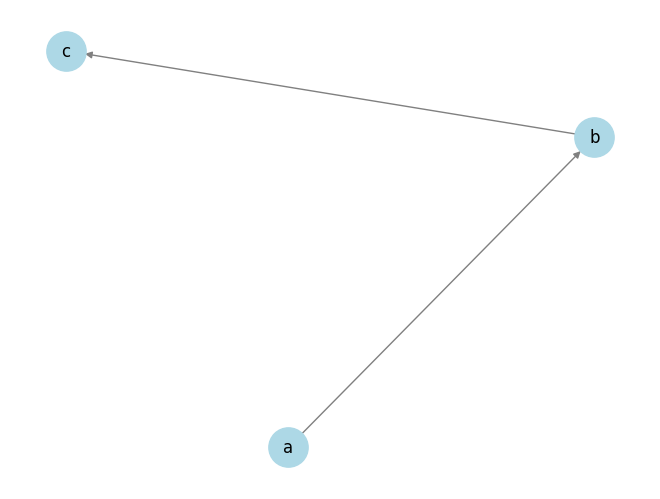

In [4]:
pos = nx.spring_layout(G)  # use a spring layout for positioning
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=800, arrows=True)

If we do not want to explicitly add isolated nodes, we can omit the call to `add_node`. We can simply add edges, which will automatically add those nodes that haven't been created before.

<span style="color:red">**TODO:** Add two edges `(c,d)` and `(d, a)` to the network and visualise it.</span>

In [5]:
G.add_edge('c', 'd')
G.add_edge('d', 'a')

if we want to count the number of nodes or edges, we can use the `number_of_nodes()` and `number_of_edges()` functions.

<span style="color:red">**TODO:** Print the number of nodes and links of this network.</span>

In [6]:
print('Network has {} nodes and {} edges'.format(G.number_of_nodes(), G.number_of_edges()))

Network has 4 nodes and 4 edges


The `nodes` dictionary of a `networkx` object contains all nodes of the network. We can use a for loop to iterate through its elements. 

<span style="color:red">**TODO:** Use the `nodes` dictionary of the class `Network` to print all nodes.</span>

In [7]:
for node, data in G.nodes(data=True):
    print(node, data)

a {}
b {}
c {}
d {}


We can access properties of individual nodes by indexing the `nodes` dictionary with the node name.

<span style="color:red">**TODO:** Print the properties of node `a`.</span>

In [8]:
G.nodes['a']

{}

We observe that the `Network` class stores a dictionary for each node. This dictionary contains node properties as key-value pairs. Default properties for an undirected network are `inweight` and `outweight` which count the weights of edges, and the `degree`, i.e. the number of neighbours to which a node is connected. For directed networks, we have an `indegree` and `outdegree`, which count the number of links that point to a node and away from the node respectively. Since the node properties are stored in a dictionary, we can store arbitrary additional node properties as key value pairs. 

<span style="color:red">**TODO:** Set an age property for each node in the network.</span>

In [9]:
# Set an age property for each node.
G.nodes['a']['age'] = 48
G.nodes['b']['age'] = 24
G.nodes['c']['age'] = 33
G.nodes['d']['age'] = 19

Printing the `nodes` dictionary again reveals that an age property was added to the property dictionaries of each node.

<span style="color:red">**TODO:** Iterate through all nodes and print all node properties.</span>

In [10]:
for node, data in G.nodes(data=True):
    print(node, data)

a {'age': 48}
b {'age': 24}
c {'age': 33}
d {'age': 19}


Finally, we are often interested to search for those nodes in a network which have certain properties. For this we can use the `find_nodes` function. It returns all nodes whose properties match a certain condition, which we can set using a lambda expression.

<span style="color:red">**TODO:** Print all nodes whose age is larger than 40.</span>

In [11]:
older_than_40 = [node for node, data in G.nodes(data=True) if data.get('age', 0) > 40]
print("\nNodes with age > 40:", older_than_40)


Nodes with age > 40: ['a']


The `edges` dictionary of the network contains all edges (links) in the network, along with their properties:

<span style="color:red">**TODO:** Iterate through the edge dictionary of the `network` instance</span>

In [12]:
for u, v, data in G.edges(data=True):
    print((u, v), data)

('a', 'b') {}
('b', 'c') {}
('c', 'd') {}
('d', 'a') {}


We see that each edge is stored as a python `tuple`, where the elements are the source and target node. Just like for the nodes, each edge can contain arbitrary attributes that are stored in a dictionary. We can add a `weight` attribute which counts the number of edges between two nodes. We can add weighte dedges with the function `add_weighted_edges_from`.

<span style="color:red">**TODO:** Set the weight attribute of each edge to 1 and then set one edge's weight to 2. </span>

In [13]:
# add the 'weight' property to each existing edge
G.add_weighted_edges_from([(u, v, 1) for u, v in G.edges])
# G.add_edge('c', 'd', weight=1)
G.add_edge('a', 'b', weight=2)

Just like for nodes, we can search for edges that exhibit certain attributes. 
<span style="color:red">**TODO:** Print all edges that have a weight larger than 1.0</span>

In [14]:
high_weight_edges = [(u, v, data) for u, v, data in G.edges(data=True) if data.get('weight', 1) > 1.0]
print("\nEdges with weight > 1.0:", high_weight_edges)


Edges with weight > 1.0: [('a', 'b', {'weight': 2})]


Finally, we can also remove nodes or edges. Importantly, we assume that a network can contain isolated nodes (i.e. nodes with no incident edges), while it can (obviously) only contain edges between nodes that actually exist. 

This has the important implication that a call to `remove_node` will remove all edges incident to the removed node. A call to `remove_edge` on the other hand, does not remove the nodes to which the edge is connected, thus possibly isolating the node.

<span style="color:red">**TODO:** Remove node `a` as well as edge `(c,d)` and visualise the remaining network</span>

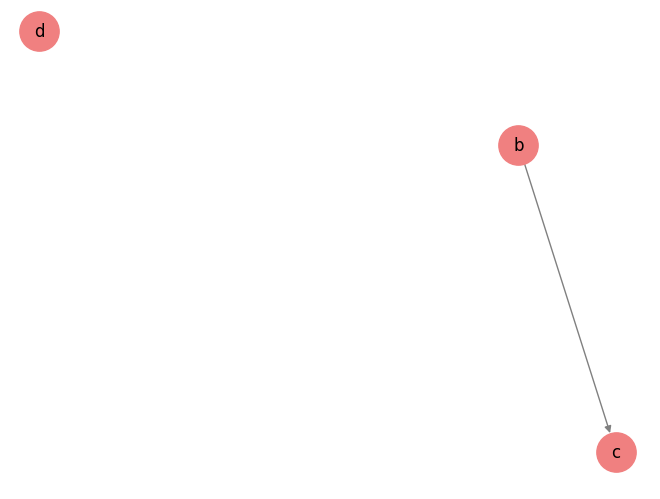

In [15]:
if 'a' in G:
    G.remove_node('a')

# Remove edge (c, d) if it exists.
if G.has_edge('c', 'd'):
    G.remove_edge('c', 'd')

nx.draw(G, with_labels=True, node_color='lightcoral', edge_color='gray', node_size=800, arrows=True)

## 2. Reading and writing network data

In the course, we will often analyse real-world data on complex networks. The simplest way to store such data is in terms of adjacency lists, i.e. a text file where each line contains the source and target of an edge, separated by a special character.

<span style="color:red">**TODO**: Store the example network in a file `01_example_network.edges` and take a look at the generated file</span>

In [30]:
nx.write_edgelist(G, "data/01_example_network.edges", delimiter=",")

We can load network data files using the function `read_edgelist`. Test what the `delimiter` and `create_using` parameters do.
<span style="color:red">**TODO**: Load the example network from the file `01_example_network.edges`</span>

In [31]:
G_new = nx.read_edgelist("data/01_example_network.edges", delimiter=",", create_using=nx.DiGraph())

In [33]:
print(G_new)

DiGraph with 2 nodes and 1 edges


## 3. Visualising networks



We can customize the style of the network visualization by passing a parameter dictionary `style`. 

<span style="color:red">**TODO**: Create a parameter dictionary `style` that assigns individual colors to nodes, and adjust node size and edge width and color.</span>

In [36]:
help(nx.draw_networkx)

Help on function draw_networkx in module networkx.drawing.nx_pylab:

draw_networkx(G, pos=None, arrows=None, with_labels=True, **kwds)
    Draw the graph G using Matplotlib.

    Draw the graph with Matplotlib with options for node positions,
    labeling, titles, and many other drawing features.
    See draw() for simple drawing without labels or axes.

    Parameters
    ----------
    G : graph
        A networkx graph

    pos : dictionary, optional
        A dictionary with nodes as keys and positions as values.
        If not specified a spring layout positioning will be computed.
        See :py:mod:`networkx.drawing.layout` for functions that
        compute node positions.

    arrows : bool or None, optional (default=None)
        If `None`, directed graphs draw arrowheads with
        `~matplotlib.patches.FancyArrowPatch`, while undirected graphs draw edges
        via `~matplotlib.collections.LineCollection` for speed.
        If `True`, draw arrowheads with FancyArrowPatch

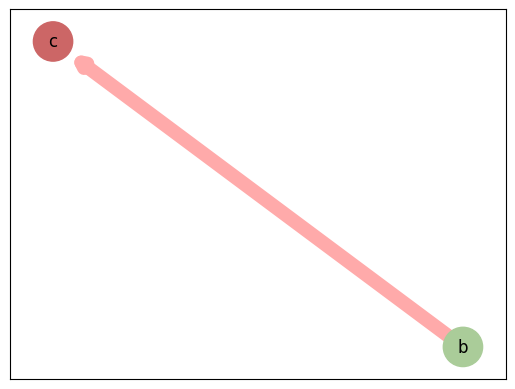

In [39]:
node_colors = []
for node in G_new.nodes():
    # For example, assign red color to node 'c' and a default color to others.
    node_colors.append('#cc6666' if node == 'c' else '#aacc99')

style = {
    'node_size': 800,
    'node_color': node_colors,
    'edge_color': '#ffaaaa',
    'width': 10
}

nx.draw_networkx(G_new, pos, **style)